# Micro-Credit Defaulter Model

**Problem Statement**

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

**Exercise**

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  


In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
import statsmodels
import scipy.stats as stats
import statsmodels.stats.proportion as smpt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,accuracy_score, classification_report,f1_score,cohen_kappa_score


In [2]:
path='C:/Users/pravat/Desktop/PURNIMA/DATA SCIENCE/FLIPROBO PROJECTS/PROJECT 6/datafile2.csv'


In [3]:
d1 = pd.read_csv(path)
d1.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [4]:
d1.isnull().sum()


Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [5]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

# EDA Part


In [6]:
lst = [d1]
for column in lst:
    column.loc[column["rental30"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["rental30"] > 0) & (column["rental30"] <= 19766), 'balance_group'] = 'low balance'
    column.loc[(column["rental30"] > 19766) & (column["rental30"] <= 118572), 'balance_group'] = 'average balance'
    column.loc[(column["rental30"] > 118572), 'balance_group'] = 'high balance'

In [7]:
count_balance_response_pct = pd.crosstab(d1['label'],d1['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

In [8]:
bal = pd.DataFrame(d1['balance_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct[1]
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

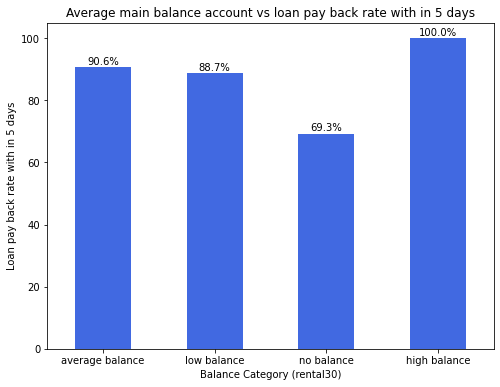

In [9]:
plot_balance = bal['% Subscription'].plot(kind = 'bar',
                                               color = ('royalblue'),
                                               figsize = (8,6))

plt.title('Average main balance account vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Balance Category (rental30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches,
                      bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot infers us how customers with different main balance levels are paying back the loan with in five days. The high balance level people are with 100% rate i.e they are paying loan within 5 days. Coming to the average and low balance people it is observed that around 10%-12% of people are not paying the loan within 5 days.

Coming to low balance level people, it is observed that around 30% of people are not paying back the loan with in stipulated 5 days of time. The 30% of people with no balance or negative balance people are creating a major loss to the company without paying back the loan within five days of time.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with no balance, average and high balance level people notifying them to pay the loan back within five days of time.


In [10]:
lst = [d1]
for column in lst:
    column.loc[column["fr_ma_rech30"] <=0,  'frequency_group'] = 'no frequency'
    column.loc[(column['fr_ma_rech30'] > 0) & (column['fr_ma_rech30'] <=1 ), 'frequency_group'] = 'low frequency'
    column.loc[(column['fr_ma_rech30'] >1) & (column['fr_ma_rech30'] <=2), 'frequency_group'] = 'medium frequency'
    column.loc[(column['fr_ma_rech30'] >2), 'frequency_group'] = 'high frequency'

In [11]:
count_fre_response_pct = pd.crosstab(d1['label'],d1['frequency_group']).apply(lambda x: x/x.sum() * 100)
count_fre_response_pct = count_fre_response_pct.transpose()

In [12]:
fre = pd.DataFrame(d1['frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_fre_response_pct[1]
fre.drop('frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

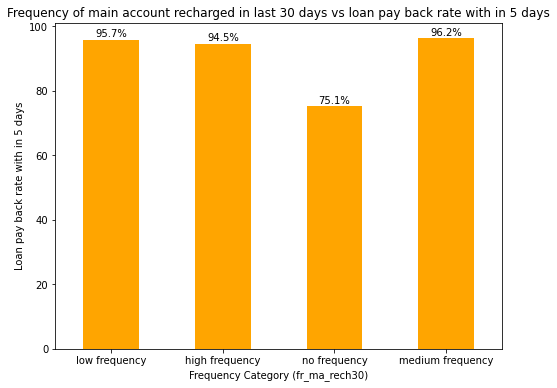

In [14]:
plot_fre = fre['% Subscription'].plot(kind = 'bar',
                                               color = ('orange'),
                                               figsize = (8,6))

plt.title('Frequency of main account recharged in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Frequency Category (fr_ma_rech30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).astype(str)):
    plot_fre.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')

The above bar plot infers us how customers with different frequency levels (main account recharge) are paying back the loan within five days. The is no 100% rate in any of the frequency levels to pay back the loan within 5 days. Coming to the average and low & medium frequency people it is observed that around 5%-6% of people are not paying the loan within 5 days.

Coming to low frequency level people, it is observed that around 25% of people are not paying back the loan with in stipulated 5 days of time. The 25% people who are not getting their main account recharge for 30 days creating a major loss to the company without paying back the loan within five days of time.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all frequency levels and especially on no frequency level people notifying them to pay the loan back within five days of time.


In [15]:
lst = [d1]
for column in lst:
    column.loc[column["cnt_loans30"] <=0,  'loan_frequency_group'] = 'no loans'
    column.loc[(column['cnt_loans30'] > 0) & (column['cnt_loans30'] <=1 ), 'loan_frequency_group'] = 'low num of loans'
    column.loc[(column['cnt_loans30'] >1) & (column['cnt_loans30'] <=4), 'loan_frequency_group'] = 'medium num of loans'
    column.loc[(column['cnt_loans30'] >4), 'loan_frequency_group'] = 'high num of loans'

In [17]:
count_loan_response_pct = pd.crosstab(d1['label'],d1['loan_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loan_response_pct = count_loan_response_pct.transpose()

In [18]:
fre = pd.DataFrame(d1['loan_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre['% Subscription'] = count_loan_response_pct[1]
fre.drop('loan_frequency_group',axis = 1,inplace = True)

fre['fre'] = [1,2,0,3]
fre= fre.sort_values('fre',ascending = True)

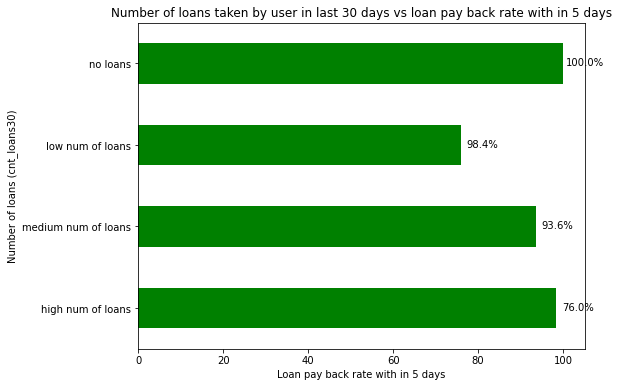

In [20]:
plot_fre = fre['% Subscription'].plot(kind = 'barh',
                                               color = ('green'), figsize = (8,6))

plt.title('Number of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Number of loans (cnt_loans30)')
plt.xlabel('Loan pay back rate with in 5 days')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre.patches,
                      fre['% Subscription'].round(1).sort_values(ascending = True).round(1).astype(str)):
    plot_fre.text(rec.get_width()+5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

The above bar plot infers us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.

Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the high number of loan level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people from low number of loans category are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all loan levels and especially on low & high level people notifying them to pay the loan back within five days of time.


In [21]:
lst = [d1]
for column in lst:
    column.loc[column["amnt_loans30"] <=0,  'loanamnt_frequency_group'] = 'no loans'
    column.loc[(column['amnt_loans30'] > 0) & (column['amnt_loans30'] <=6 ), 'loanamnt_frequency_group'] = 'low amnt of loans'
    column.loc[(column['amnt_loans30'] >6) & (column['amnt_loans30'] <=24), 'loanamnt_frequency_group'] = 'medium amnt of loans'
    column.loc[(column['amnt_loans30'] >24), 'loanamnt_frequency_group'] = 'high amnt of loans'

In [22]:
count_loanamnt_response_pct = pd.crosstab(d1['label'],d1['loanamnt_frequency_group']).apply(lambda x: x/x.sum() * 100)
count_loanamnt_response_pct = count_loanamnt_response_pct.transpose()

In [24]:
fre1 = pd.DataFrame(d1['loanamnt_frequency_group'].value_counts())
#bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
fre1['% Subscription'] = count_loanamnt_response_pct[1]
fre1.drop('loanamnt_frequency_group',axis = 1,inplace = True)

fre1['fre1'] = [1,2,0,3]
fre1= fre1.sort_values('fre1',ascending = True)

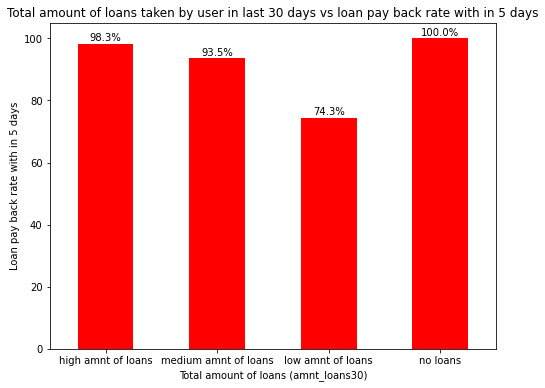

In [25]:
plot_fre1 = fre1['% Subscription'].plot(kind = 'bar',
                                               color = ('red'), figsize = (8,6))

plt.title('Total amount of loans taken by user in last 30 days vs loan pay back rate with in 5 days')
plt.ylabel('Loan pay back rate with in 5 days')
plt.xlabel('Total amount of loans (amnt_loans30)')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_fre1.patches,
                      fre1['% Subscription'].round(1).astype(str)):
    plot_fre1.text(rec.get_x() + rec.get_width()/2, 
                      rec.get_height() + 1, 
                      label+'%',  
                      ha = 'center', 
                      color = 'black')


The above bar plot infers us how customers with different loans levels taken are paying back the loan within five days. In the data set people not taken loans are labelled as ‘1’. So we should not consider the people with no loans labelled in the above graph.

Considering the remaining levels, there is no 100% rate in any of the loan levels to pay back the loan within 5 days. Coming to the low amount level people it is observed that around 25% of people are not paying the loan within 5 days. Only 2% of the people taken high amount of loans are not paying the loan within 5 days. This is followed by the people with medium number of loans having defaulters of 7% approximately.

In order to decrease loss to the company, the company should start some marketing strategies like sms alerting and notifications and others on the people with all loan levels and especially on low & high level people notifying them to pay the loan back within five days of time.

As 'msisdn', 'pcircle', 'pdate' features are not having much importance, we can ignore them. And also removing the extra columns created for the EDA part.


In [26]:
d1.drop(['msisdn', 'pcircle', 'pdate','balance_group','frequency_group','loan_frequency_group','loanamnt_frequency_group'],axis=1,inplace=True)
d1

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


# Check for the correlation with the dependent variable 'Label


In [27]:
corr_data = d1
corr = corr_data.corr()
corr

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
Unnamed: 0,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003962,-0.003506,-0.001853,-0.001133,-0.001064,...,0.001725,0.002387,0.000698,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411
label,0.000403,1.000000,-0.003786,0.168296,0.166148,0.058394,0.075803,0.003729,0.001711,0.131804,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.002048,-0.003786,1.000000,0.001103,0.000372,-0.000879,-0.000742,0.001692,-0.001693,0.004255,...,-0.001828,-0.001728,-0.002764,0.004665,-0.000611,-0.002321,-0.001192,0.002771,0.001939,0.002202
daily_decr30,0.002739,0.168296,0.001103,1.000000,0.977704,0.442023,0.459247,0.000486,-0.001636,0.275837,...,0.366115,0.471491,-0.000028,-0.011611,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047174
daily_decr90,0.003077,0.166148,0.000372,0.977704,1.000000,0.434616,0.471976,0.000907,-0.001886,0.264131,...,0.340386,0.447868,0.000025,-0.005592,0.009446,0.567204,0.397251,-0.034686,0.019399,0.040800
rental30,-0.003962,0.058394,-0.000879,0.442023,0.434616,1.000000,0.955145,-0.001136,0.003217,0.130914,...,0.180746,0.233938,-0.000808,-0.016518,0.004050,0.299066,0.234277,-0.035477,0.072968,0.095036
rental90,-0.003506,0.075803,-0.000742,0.459247,0.471976,0.955145,1.000000,-0.001735,0.002743,0.124691,...,0.171949,0.232249,-0.001382,-0.009495,0.005164,0.327572,0.251226,-0.034129,0.067080,0.099414
last_rech_date_ma,-0.001853,0.003729,0.001692,0.000486,0.000907,-0.001136,-0.001735,1.000000,0.001790,-0.000146,...,0.001191,0.000901,0.000928,0.001835,-0.000226,0.000868,-0.001123,0.002771,-0.002234,-0.001584
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003217,0.002743,0.001790,1.000000,-0.000149,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,-0.001064,0.131804,0.004255,0.275837,0.264131,0.130914,0.124691,-0.000146,-0.000149,1.000000,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260


<AxesSubplot:>

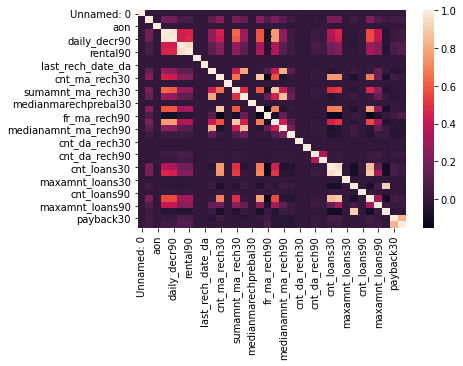

In [28]:
corr_data = d1
corr = corr_data.corr()
sns.heatmap(corr,annot_kws={'size':10})

In [29]:
d6=d1.copy()

In [30]:
d6.drop(['last_rech_date_da','fr_da_rech30','maxamnt_loans30','medianamnt_loans30','maxamnt_loans90','medianamnt_loans90','cnt_da_rech30','cnt_da_rech90','fr_da_rech90'],axis=1,inplace=True)


In [31]:
columns=d6.columns

# Checking the normality of the features


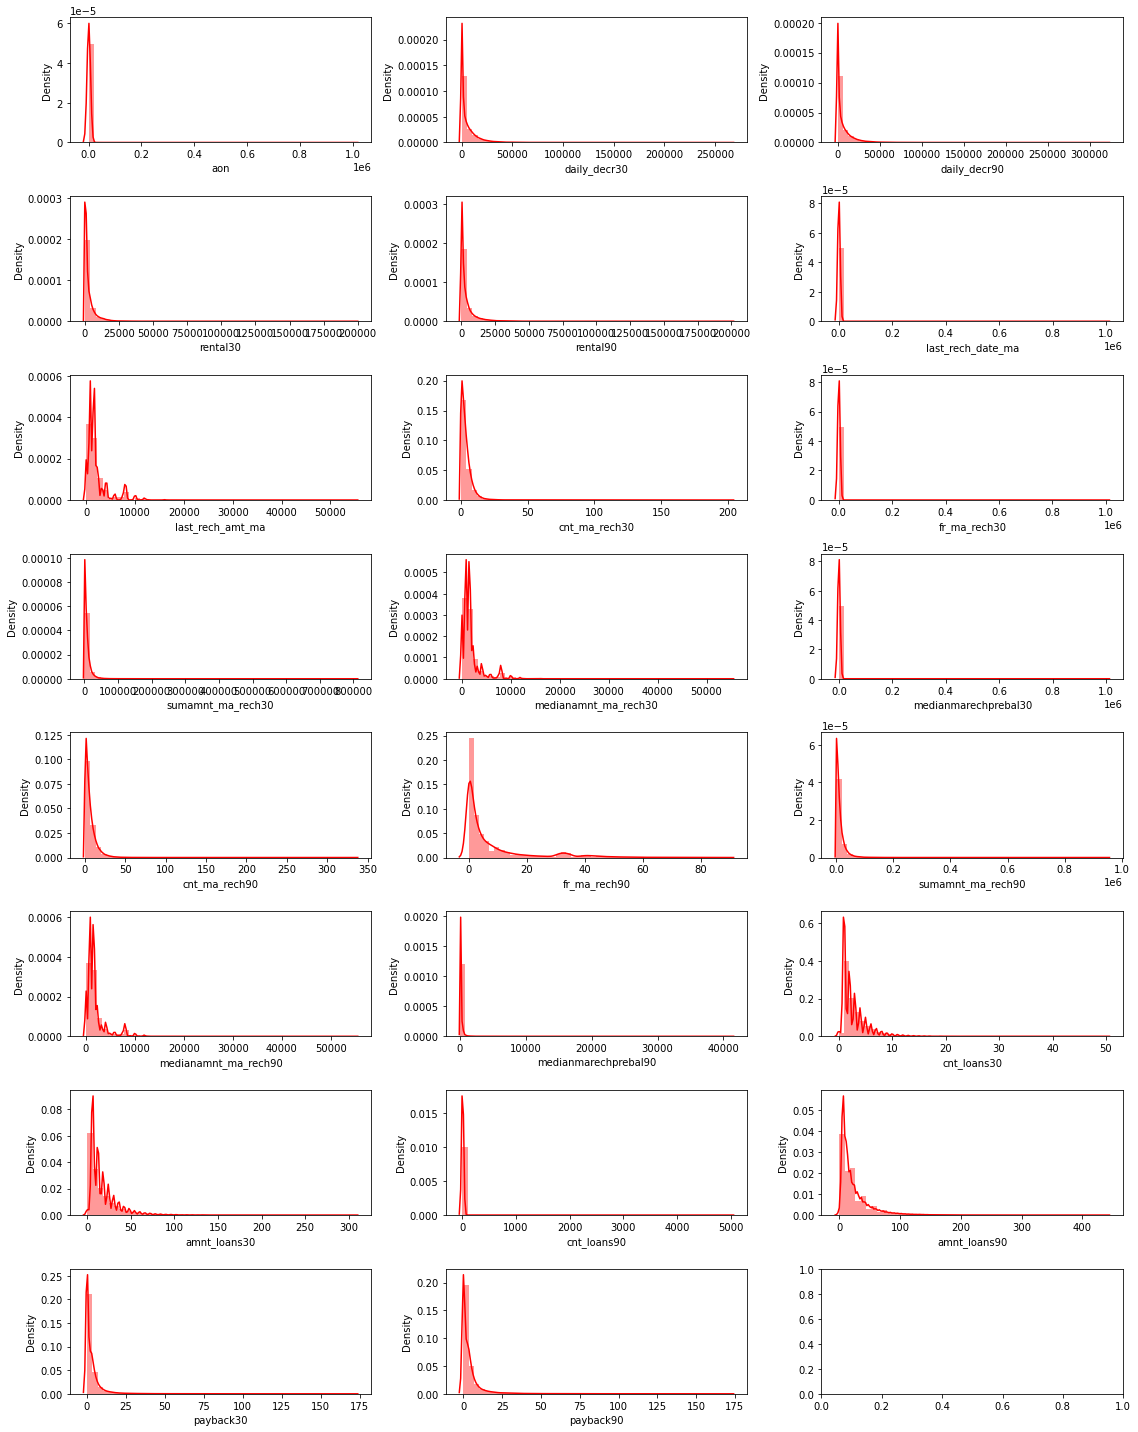

In [32]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(d6[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

In [33]:
d3=d1.copy()
d3

,Unnamed: 0,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,1,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,2,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,3,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,4,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,5,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,209590,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,209591,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,209592,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


# Outlier Transformation:
Several changes were made to the dataset to prepare it for analysis. As there are no null values in the data set there is no need to perform any null value imputation for the data set. There are outliers for many variables in the data set.
By observing these features, I found way of doing an outlier’s imputation technique for the data of the features whose z-score >3. There are many ways to deal with outliers such as imputing outlier’s with mean, median, mode (categorical), k-NN imputation, mice imputation or simply removing and others.

For this data set I simply choose mean for imputing the outliers with the respective features. After performing mean, I also applied cube root for the data to bring data closer as to make the distribution normal.

After performing the mean imputation and also applying cube root to the data become so what normally distributed compared to the data which haven’t undergone any type of imputation or outlier transformation.

So, outlier imputation is far better than simply removing the outliers from the data. As the data set belongs to the loan defaulters or not the outliers are also important for us to get the unbiased results after performing machine learning algorithms.


In [34]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']
for i in range(len(columns)):
    d3[columns[i]]=zscore(d3[columns[i]])
    for j in range(len(d3[columns[i]])):
        if d3[columns[i]][j]>3 or d3[columns[i]][j]<-3:
            d3[columns[i]].replace(d3[columns[i]][j],d3[columns[i]].median(),inplace=True)
    d3[columns[i]]=np.cbrt((d3[columns[i]]))

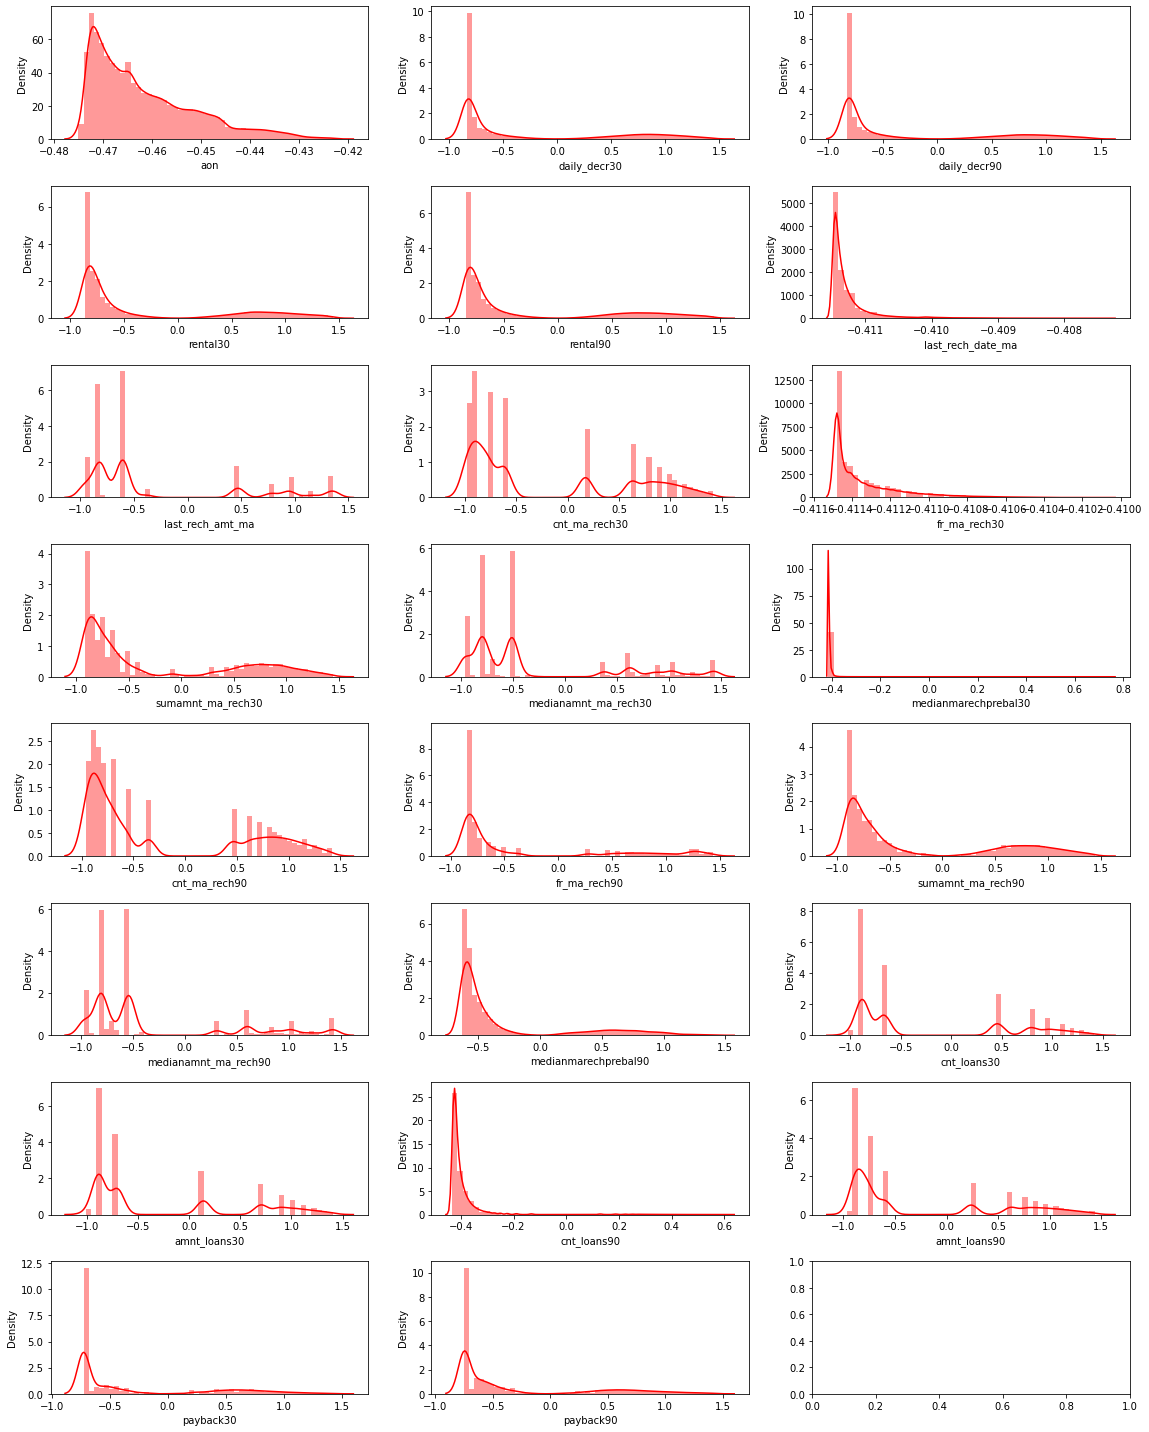

In [35]:
columns=['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_loans30', 'amnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'payback30', 'payback90']
fig,ax = plt.subplots(8,3,figsize=(16,20))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.distplot(d3[col],ax=ax[i],color='red')
plt.tight_layout()
plt.show()

In [36]:
d3.drop(['label'],axis=1,inplace=True)

# Statistical Analysis


In [37]:
def two_sample_ttest(target_variable, numerical_column):
    reject = []
    not_reject = []
    print('H0: The mean of ' + numerical_column.name + ' is equal for both categories of ' + target_variable.name)
    print('Ha: The mean of ' + numerical_column.name + ' is NOT equal for both categories of ' + target_variable.name)
    print()
    grp0 = numerical_column[target_variable == 0]
    grp1 = numerical_column[target_variable == 1]
    ttest = stats.ttest_ind(grp0, grp1)
    print(ttest)
    rejectH0 = ttest[1] < 0.05
    print()
    #return rejectH0
    if rejectH0:
        print('Reject H0')
        reject.append(col)
        print('\n')
        print('-------------------------------------------------------------------------')
    else:
        print('Failed to Reject H0')   
        not_reject.append(col)
        print()
        print('-------------------------------------------------------------------------')
    #print(reject)
    #print(not_reject)

In [38]:
num_cols = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90']

#reject = []
#not_reject = []
for col in num_cols:
    rejectH0 = two_sample_ttest(d1['label'], d3[col])

H0: The mean of aon is equal for both categories of label
Ha: The mean of aon is NOT equal for both categories of label

Ttest_indResult(statistic=-35.6100944826312, pvalue=6.624744471006446e-277)

Reject H0


-------------------------------------------------------------------------
H0: The mean of daily_decr30 is equal for both categories of label
Ha: The mean of daily_decr30 is NOT equal for both categories of label

Ttest_indResult(statistic=-95.9225406286059, pvalue=0.0)

Reject H0


-------------------------------------------------------------------------
H0: The mean of daily_decr90 is equal for both categories of label
Ha: The mean of daily_decr90 is NOT equal for both categories of label

Ttest_indResult(statistic=-95.84668957439527, pvalue=0.0)

Reject H0


-------------------------------------------------------------------------
H0: The mean of rental30 is equal for both categories of label
Ha: The mean of rental30 is NOT equal for both categories of label

Ttest_indResult(st

In [39]:
X1=d3

# VIF

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [41]:
vif= pd.DataFrame()
vif['Features'] = d3.columns
vif['vif']=[variance_inflation_factor(d3.values,i) for i in range(d3.shape[1])]

In [42]:
vif[vif['vif']>4]

,Features,vif
0,Unnamed: 0,4.000696e+00
1,aon,1.966834e+03
2,daily_decr30,1.249401e+01
3,daily_decr90,1.301375e+01
4,rental30,6.166644e+00
5,rental90,6.712155e+00
6,last_rech_date_ma,1.866114e+06
7,last_rech_date_da,4.403004e+06
9,cnt_ma_rech30,4.514320e+00
10,fr_ma_rech30,6.039373e+06


From the above results we can infer that the many features are having strong multicollinearity in the data set. This resembles that there is need to go for PCA (Principal Component Analysis).

If we won’t perform PCA the noise or correlation between the independent variables will affect the model prediction and model results. More than 50% of the features are having vif >4 so it is mandatory to perform PCA in order to reduce the multicollinearity effect among the independent variables.


# PCA

In [43]:
from sklearn.decomposition import PCA

In [44]:
pca=PCA()
pca.fit(d3)

PCA()

In [45]:
data_pca= pca.transform(d3)

In [46]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
cumsum

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

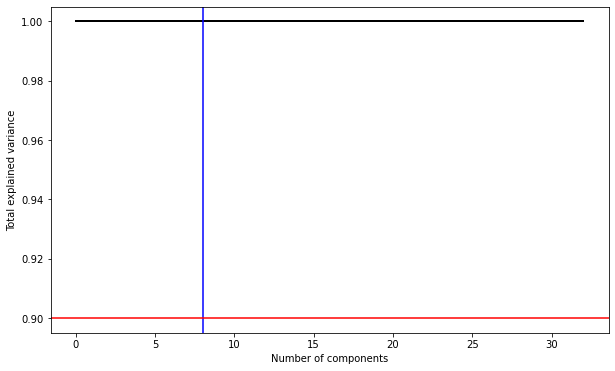

In [59]:
plt.figure(figsize=(10,6))

plt.plot(range(0,33), cumsum, color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.axvline(8, c='b')
plt.axhline(0.9, c='r')

plt.show()

In [51]:
cov_matrix = np.cov(d3.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 3.66078627e+09  5.26636181e-01  1.05747178e+02 ... -6.39765700e+01
  -1.07595313e+01  2.02122393e+01]
 [ 5.26636181e-01  1.10401277e-04  5.94029633e-04 ... -4.97759895e-06
   1.26514348e-04  2.10947756e-04]
 [ 1.05747178e+02  5.94029633e-04  5.63641002e-01 ... -5.15873150e-03
   8.82613798e-02  8.98065534e-02]
 ...
 [-6.39765700e+01 -4.97759895e-06 -5.15873150e-03 ...  9.75001146e-02
  -2.13322228e-03  1.83662697e-03]
 [-1.07595313e+01  1.26514348e-04  8.82613798e-02 ... -2.13322228e-03
   3.82551451e-01  3.02046363e-01]
 [ 2.02122393e+01  2.10947756e-04  8.98065534e-02 ...  1.83662697e-03
   3.02046363e-01  3.81340038e-01]]


In [52]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [53]:
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[ :, i]) for i in range(len(eig_vals))]

In [54]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 99.99999972  99.99999982  99.99999987  99.99999989  99.99999991
  99.99999993  99.99999994  99.99999995  99.99999996  99.99999997
  99.99999997  99.99999998  99.99999998  99.99999999  99.99999999
  99.99999999  99.99999999  99.99999999 100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.         100.         100.
 100.         100.         100.        ]


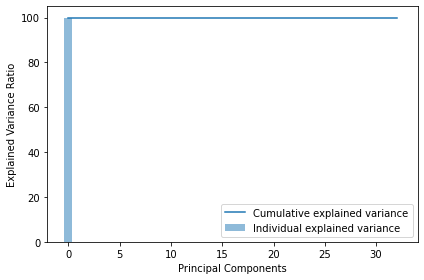

In [60]:
plt.figure(figsize=(6 , 4))
plt.bar(range(33), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(33), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [61]:
pca = PCA(n_components=13)
pca.fit(d3)
data_pca = pd.DataFrame(pca.transform(d3))
data_pca.shape

(209593, 13)

In [62]:
X1=data_pca
y1=d1['label']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(146715, 13)
(62878, 13)
(146715,)
(62878,)


# Logistic regression


In [64]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [65]:
print('Training score =', model1.score(X_train, y_train))
print('Test score =', model1.score(X_test, y_test))

Training score = 0.874743550420884
Test score = 0.8761888100766564


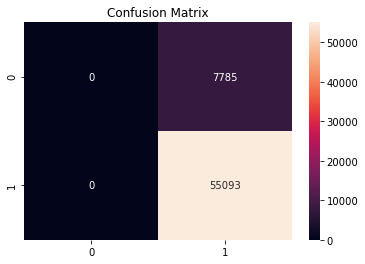

In [66]:
from sklearn.metrics import confusion_matrix
ypred = model1.predict(X_test)
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [67]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8761888100766564
Precision = 0.8761888100766564
Recall = 1.0
F1 Score = 0.9340092056522366


ROC AUC = 0.8226317615262362


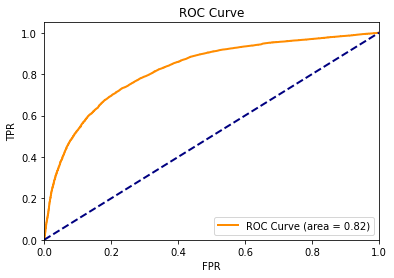

In [68]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = model1.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

From the above results it is observed that all the metrics accuracy, precision, recall and f1-score are good. In order to improve the score very much high I also tried with various other models such as decision tree, random forest, naïve bays, knn, and ensemble models also.

Four different classification algorithms (Logistic Regression, K-Neighbours Classifier, Decision Tree Classifier, and Gaussian NB, Random Forest, Ada boost, Gradient Boosting) were run on the dataset through K-fold cross validation and the best-performing one was (identified by observing bias and variance errors) and used to build the classification model.


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier

# KNN

In [70]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(5,30),'weights':['uniform','distance']}
GS=RandomizedSearchCV(knn,param,cv=3,scoring='f1_weighted',n_jobs=-1)
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'weights': ['uniform', 'distance']},
                   scoring='f1_weighted')

In [71]:
GS.best_params_

{'weights': 'distance', 'n_neighbors': 7}

# Decision Tree


In [72]:
dt=DecisionTreeClassifier(random_state=0)

In [73]:
param={'max_depth':np.arange(3,50),'criterion':['entropy','gini'],'min_samples_leaf':np.arange(3,20)}
GS=RandomizedSearchCV(dt,param,cv=3,scoring='f1_weighted')
GS.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'min_samples_leaf': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
                   scoring='f1_weighted')

In [74]:
GS.best_params_

{'min_samples_leaf': 11, 'max_depth': 18, 'criterion': 'entropy'}

In [75]:
LR=LogisticRegression()
NB=GaussianNB()
KNN=KNeighborsClassifier(n_neighbors=5,weights='distance')
DT=DecisionTreeClassifier(criterion='gini',max_depth=14,min_samples_leaf=19,random_state=0)
RF=RandomForestClassifier(criterion='entropy',n_estimators=7,random_state=0)
Bag=BaggingClassifier(n_estimators=3,random_state=0)
AB=AdaBoostClassifier(n_estimators=16,random_state=0)
#ABL=AdaBoostClassifier(base_estimator=LR,n_estimators=50,random_state=0)
GB=GradientBoostingClassifier(n_estimators=17)
#svm=SVC(C=10,gamma=0.001,kernel='rbf')
#stacked = StackingClassifier(classifiers=[Bag,RF,AB], meta_classifier=KNN)

# Random Forest


In [79]:
RF_var=[]
for val in np.arange(1,50):
    RF=RandomForestClassifier(criterion='gini',n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(RF, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    RF_var.append(np.var(cv_results,ddof=1))

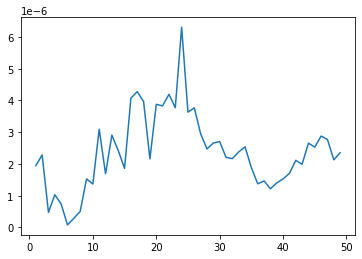

In [80]:
x_axis=np.arange(1,50)
plt.plot(x_axis,RF_var)

# To get n-estimators


In [81]:
np.argmin(RF_var)

5

In [82]:
Bag_var=[]
for val in np.arange(1,20):
    Bag=BaggingClassifier(n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(Bag, X_train,y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    Bag_var.append(np.var(cv_results,ddof=1))
  #print(val,np.var(cv_results,ddof=1))
x_axis=np.arange(1,20)

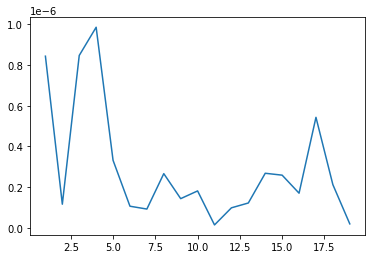

In [83]:
x_axis=np.arange(1,20)
plt.plot(x_axis,Bag_var)

In [84]:
np.argmin(Bag_var)

10

# Ada Boost Classifier


In [86]:
Ada_bias=[]
for val in np.arange(1,20):
    Ada=AdaBoostClassifier(n_estimators=val,random_state=0)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(Ada, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    Ada_bias.append(1-np.mean(cv_results))
  #print(val,1-np.mean(cv_results))


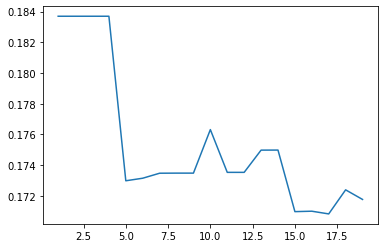

In [87]:
x_axis=np.arange(1,20)
plt.plot(x_axis,Ada_bias)

In [88]:
np.argmin(Ada_bias)

16

# Gradient Boost Clsssifier


In [89]:
GB_bias=[]
for val in np.arange(1,20):
    gb=GradientBoostingClassifier(n_estimators=val)
    kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
    cv_results = model_selection.cross_val_score(gb, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
    GB_bias.append(1-np.mean(cv_results))
  #print(val,1-np.mean(cv_results))

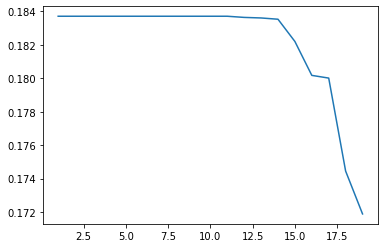

In [90]:
x_axis=np.arange(1,20)
plt.plot(x_axis,GB_bias)

In [91]:
np.argmin(GB_bias)

18

In [92]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',KNN))
models.append(('DecisionTree',DT))
models.append(('RandomForest',RF))
models.append(('BaggingClassifier',Bag))
models.append(('AdaBoost',AB))
models.append(('GBoost',GB))
#models.append(('Stacked',stacked))

# evaluate each model in turn

Logistic: 0.819906 (0.000050)
NaiveBayes: 0.816300 (0.000007)
KNN: 0.817976 (0.000006)
DecisionTree: 0.872606 (0.000003)
RandomForest: 0.879275 (0.000002)
BaggingClassifier: 0.879317 (0.000000)
AdaBoost: 0.828999 (0.000008)
GBoost: 0.819994 (0.000009)


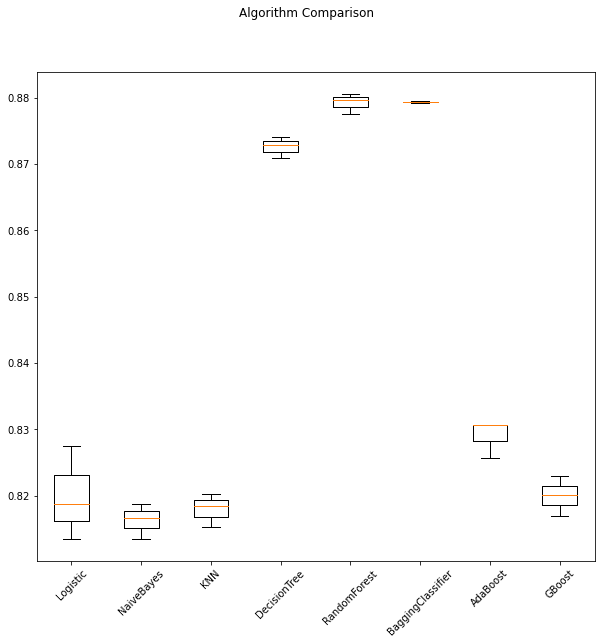

In [94]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = model_selection.cross_val_score(model, X_train, y_train,cv=kfold, scoring='f1_weighted',n_jobs=-1)
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.var(cv_results,ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure(figsize=(10,9))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names,rotation=45)
plt.show()

From the above results it is observed that Random Forest is the best performing model. By comparing all algorithms bias error and variance error, random forest is observed to be the best so it would be used to predict loan defaulters. The test of random forest with base estimator (Decision Tree (which is default for random forest), n_estimators=7) model successfully achieved a weighted F1_score of 94%, suggesting high level of strength of this model to classify loan defaulter’s.


# Random Forest


In [95]:
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=49, random_state=0)

In [96]:
predictions = RF.predict(X_test)

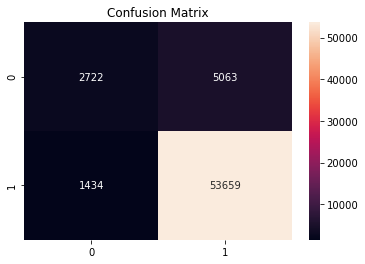

In [97]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [98]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.65      0.35      0.46      7785
           1       0.91      0.97      0.94     55093

    accuracy                           0.90     62878
   macro avg       0.78      0.66      0.70     62878
weighted avg       0.88      0.90      0.88     62878



In [99]:
tn = cm[0,0]  #True Negative
tp = cm[1,1]  #True Positives
fp = cm[0,1]  #False Positives
fn = cm[1,0]  #False Negatives

accuracy = (tp+tn)/(tp+fn+fp+tn)
precision = tp / (tp+fp)
recall = tp / (tp+fn)
f1 = 2*precision*recall / (precision+recall)

print('Accuracy =',accuracy)
print('Precision =', precision)
print('Recall =', recall)
print('F1 Score =', f1)

Accuracy = 0.8966729221667356
Precision = 0.9137801845986172
Recall = 0.9739712849182292
F1 Score = 0.9429161358344681


ROC AUC = 0.8385653261191408


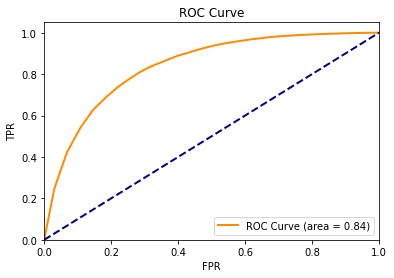

In [100]:
from sklearn.metrics import roc_curve,roc_auc_score
ypred = RF.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,ypred[:,1])
roc_auc = roc_auc_score(y_test,ypred[:,1])

print('ROC AUC =', roc_auc)
plt.figure()
lw = 2
plt.plot(fpr,tpr,color='darkorange',lw=lw,label='ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Total no of records in X_test and y_test is 62,878. The results of our random forest classifier are better than the before base line model**

TP=53133

TN=3030

FP=1960 (type-1 error)

FN=4755 (type-2 error)

**From the above results we can infer that only 10% of the data are under type-1 & type- 2 errors. Our model is unable to classify well only 10% records whether the customer is loan defaulter or not.**